**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Luis Alejandro Juárez Rodríguez
*   MATRÍCULA: A01795463

*   NOMBRE: Alberto Campos Hernández
*   MATRÍCULA: A01795645

*   NOMBRE: David Alejandro Gutiérrez Valencia
*   MATRÍCULA: A01027771

*   NOMBRE: José Ricardo Munguía Marín
*   MATRÍCULA: A01795660

In [305]:
#from google.colab import drive
#drive.mount('/content/drive')

In [306]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
#os.chdir(DIR)

In [307]:
#pip install feature-engine

In [308]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder

In [356]:
cars_df = pd.read_csv('vehicles.csv')
cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [310]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [311]:
# Eliminamos las columnas no relevantes
cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], axis=1, inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [312]:
# Almacena en 'original_amount_observations' la cantidad de observaciones (después del borrado)
original_amount_observations = cars_df.shape [0]
print(f'Cantidad de observaciones después del borrado: {original_amount_observations}')

# Almacena en 'original_amount_columns' la cantidad de columnas (después del borrado)
original_amount_columns = cars_df.shape[1]
print(f'Cantidad de columnas después del borrado: {original_amount_columns}')

Cantidad de observaciones después del borrado: 426880
Cantidad de columnas después del borrado: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [313]:
# Primero calculamos el número de observaciones que representan el 70%
observations_70 = round(original_amount_observations * 0.7)
print(f'Cantidad de observaciones que representan el 70% de las observaciones: {observations_70}')


Cantidad de observaciones que representan el 70% de las observaciones: 298816


In [314]:
# Bloque de código informativo:

# Imprimimos la cantidad de columnas en el DataFrame antes de la limpieza de valores nulos
print(f'Cantidad de columnas en el DataFrame: {cars_df.shape[1]}')

# Imprimimos el porcentaje de valores nulos por columna del DataFrame antes de la limpieza de valores nulos
result = cars_df.isnull().mean() * 100
result = result.rename('Porcentaje de valores nulos')
result.to_frame()

Cantidad de columnas en el DataFrame: 18


,Porcentaje de valores nulos
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [315]:
# Eliminamos del DataFrame las columnas que tengan más del 30% de valores faltantes
cars_df.dropna(axis=1, thresh=observations_70, inplace=True)
cars_df.head()

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [316]:
# Bloque de código informativo:

# Imprimimos la cantidad de columnas en el DataFrame después de la limpieza de valores nulos
print(f'Cantidad de columnas en el DataFrame: {cars_df.shape[1]}')

# Imprimimos el porcentaje de valores nulos por columna del DataFrame después de la limpieza de valores nulos
result = cars_df.isnull().mean() * 100
result = result.rename('Porcentaje de valores nulos')
result.to_frame()

Cantidad de columnas en el DataFrame: 12


,Porcentaje de valores nulos
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
fuel,0.705819
odometer,1.030735
title_status,1.930753
transmission,0.598763


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [317]:
# Lista de nombres de columnas con menos de 5% de valores faltantes
columns_less_5_nan_values = []

# Ciclo for para encontrar las columnas con menos de 5% de valores faltantes y agregarlas a la lista 'columns_less_5_nan_values'
for a, b in result.items():
  if(b < 5):
    columns_less_5_nan_values.append(a)

# Imprimimos los nombres de las columnas en la lista
print(f'Columnas con menos de 5% de valores faltantes: {columns_less_5_nan_values}')
print(f'Observaciones antes de la presente limpieza: {original_amount_observations}')

# Eliminamos del DataFrame los valores faltantes de las columnas en la lista 'columns_less_5_nan_values'
cars_df.dropna(subset=columns_less_5_nan_values, inplace=True)
print(f'Observaciones después de la presente limpieza: {cars_df.shape[0]}')
print(f'Se eliminaron el {((-cars_df.shape[0]/original_amount_observations * 100) + 100): .2f}% de las observaciones totales')

Columnas con menos de 5% de valores faltantes: ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state']
Observaciones antes de la presente limpieza: 426880
Observaciones después de la presente limpieza: 389604
Se eliminaron el  8.73% de las observaciones totales


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [318]:
# Imprimimos los porcentajes de valores nulos para observar si aún hay valores faltantes:

# Imprimimos la cantidad de columnas en el DataFrame antes de la limpieza de valores nulos
print(f'Cantidad de columnas en el DataFrame: {cars_df.shape[1]}')

# Imprimimos el porcentaje de valores nulos por columna del DataFrame antes de la limpieza de valores nulos
result = cars_df.isnull().mean() * 100
result = result.rename('Porcentaje de valores nulos')
result.to_frame()

Cantidad de columnas en el DataFrame: 12


,Porcentaje de valores nulos
region,0.000000
region_url,0.000000
price,0.000000
year,0.000000
manufacturer,0.000000
model,0.000000
fuel,0.000000
odometer,0.000000
title_status,0.000000
transmission,0.000000


In [319]:
# La columna 'type' aún tiene valores faltantes, observemos de que tipo son

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          306976 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


In [320]:
# La columna 'type' tiene valores faltantes del tipo object, veamos cuántos tipos diferentes de valores tiene

result = cars_df.nunique()
result = result.rename('Valores únicos')
result.to_frame()

,Valores únicos
region,404
region_url,413
price,14679
year,107
manufacturer,41
model,21866
fuel,5
odometer,99827
title_status,6
transmission,3


In [321]:
# La columna 'type' aún tiene valores faltantes, es del tipo object y tiene 13 valores distintos, es una variable categórica.

# Vamos a utilizar la moda para imputar la columna.
cars_df.type.fillna(cars_df.type.mode()[0], inplace=True)

# Imprimimos el porcentaje de valores nulos por columna del DataFrame después de la limpieza de valores nulos
result = cars_df.isnull().mean() * 100
result = result.rename('Porcentaje de valores nulos')
result.to_frame()

,Porcentaje de valores nulos
region,0.0
region_url,0.0
price,0.0
year,0.0
manufacturer,0.0
model,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

Text(0.5, 1.0, 'Histograma del odómetro')

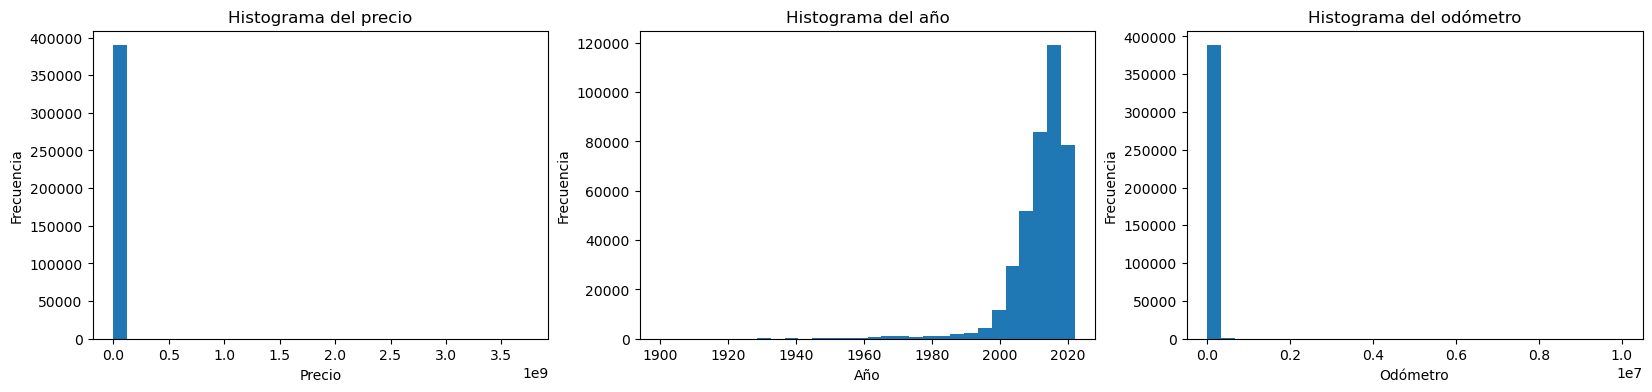

In [322]:
# Creamos el plano para pintar las gráficas
fig, ax = plt.subplots(1, 3, figsize=(20,4))

# Pintamos el histograma de 'price' con sus leyendas:
ax[0].hist(cars_df[['price']], bins=30)
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma del precio')

# Pintamos el histograma de 'year' con sus leyendas:
ax[1].hist(cars_df[['year']], bins=30)
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Histograma del año')

# Pintamos el histograma de 'odometer' con sus leyendas:
ax[2].hist(cars_df[['odometer']], bins=30)
ax[2].set_xlabel('Odómetro')
ax[2].set_ylabel('Frecuencia')
ax[2].set_title('Histograma del odómetro')

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [323]:
# Importamos datetime para calcular el año actual
from datetime import datetime

# Calculamos el año actual:
actual_year = datetime.now().year
print(f'Año actual: {actual_year}')

# Ejecutamos una función lambda para realizar el cálculo y agregarlo al DataFrame en la nueva columna 'age'
cars_df['age'] = cars_df['year'].apply(lambda x: actual_year - x)

# Eliminamos la columna 'year'
cars_df.drop(['year'], axis=1, inplace=True)
cars_df.head()

Año actual: 2024


,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0


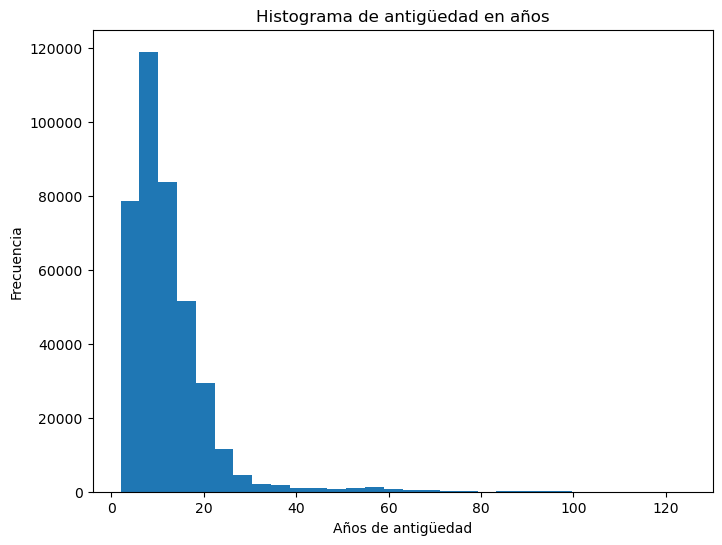

In [324]:
# Definimos el plano para pintar la gráfica
plt.figure(figsize=(8, 6))

# Pintamos el histograma
plt.hist(cars_df['age'], bins=30)
plt.xlabel('Años de antigüedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de antigüedad en años') 
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

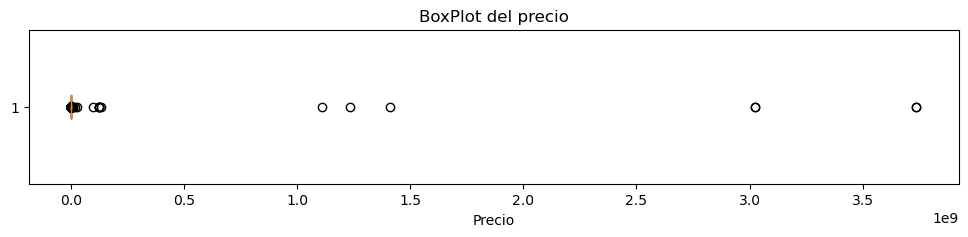

In [325]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['price'], vert=False)
plt.xlabel('Precio')  
plt.title('BoxPlot del precio') 
plt.show()

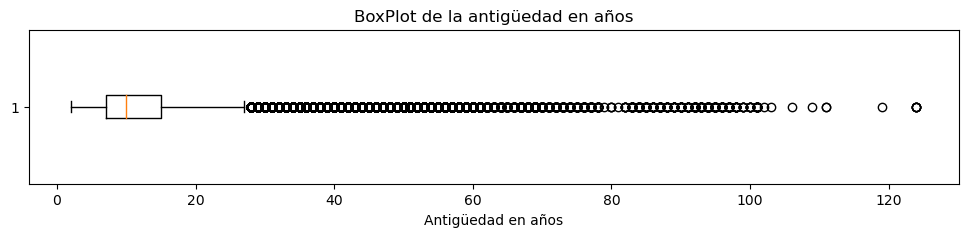

In [326]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['age'], vert=False)
plt.xlabel('Antigüedad en años')  
plt.title('BoxPlot de la antigüedad en años') 
plt.show()

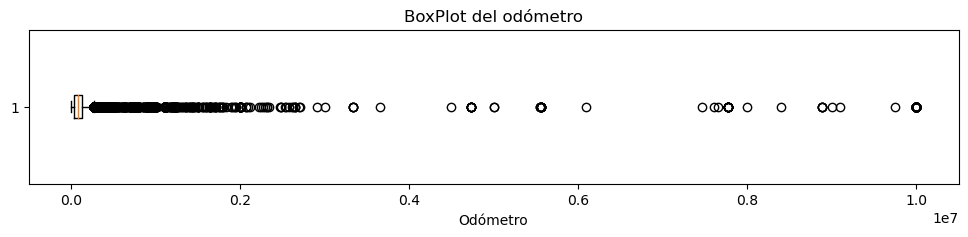

In [327]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['odometer'], vert=False)
plt.xlabel('Odómetro')  
plt.title('BoxPlot del odómetro') 
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

#### Nota importante

Al principio se implementó la eliminación manual de valores atípicos.

Después optamos por crear una función que elimina los valores atípicos de todas las columnas, esto lo logramos identificando las columnas del tipo correcto (int64 y float64).

Ejecutamos la función y vimos que aún así hay valores atípicos.

Creamos un ciclo que repita la función hasta eliminar todos los valores atípicos y un recolector de datos para calcular cuál fue el total de valores que se eliminaron por cada columna.

In [328]:
# Almacenamos las observaciones antes de la limpieza
column_observations_after_outliers_clean = cars_df.shape[0]
print(f'Observaciones antes de la limpieza de valores atípicos: {column_observations_after_outliers_clean}')
print('\n')

# Almacenamos los resultados
result_dict = {}

# Condición para ciclo while
condition = False

# Contador de ciclos while
counter = 0

# Elimina los valores atípicos del DataFrame dado
def delete_outliers(input_df):
  # Recorremos las columnas del DataFRame
  for column in input_df.columns:
  
    # Accedemos solo a las columnas numéricas (int64 o float64)
    if(input_df[column].dtype == 'int64' or input_df[column].dtype == 'float64'):
    
      # Calculamos los percentiles
      percentile_25 = input_df[column].quantile(0.25)
      percentile_75 = input_df[column].quantile(0.75)
  
      # Calculamos el IQR
      iqr = percentile_75 - percentile_25
  
      # Calculamos los límites
      upper_limit = percentile_75 + (1.5 * iqr)
      lower_limit = percentile_25 - (1.5 * iqr)

      # Contamos las observaciones antes de remover valores atípicos
      column_observations_before = input_df[column].count()

      # Removemos valores atípicos
      input_df = input_df[(input_df[column] >= lower_limit) & (input_df[column] <= upper_limit)]

      # Contamos las observaciones después de remover valores atípicos
      column_observations_after = input_df[column].count()

      # Imprimios las observaciones removidas en este ciclo
      print(f'Observaciones removidas de la columna {column}: {-(column_observations_after - column_observations_before)}')

      # Sumamos las observaciones removidas a un totalizador
      if column in result_dict:
        result_dict[column] += column_observations_before - column_observations_after
      else:
        result_dict[column] = column_observations_before - column_observations_after

  # Retornamos el DataFrame
  return input_df

# Repetimos el ciclo hasta que no haya más valores atípicos
while not condition:

  # Guardamos las observaciones antes de ejecutar la función 'delete_outliers'
  observations_before = cars_df.shape[0]

  # Número de iteración:
  print(f'Iteración: {counter}')

  # Ejecuta una vez la función 'delete_outliers' para eliminar valores atípicos
  cars_df = delete_outliers(cars_df)

  # Observaciones removidas:
  print(f'Observaciones removidas en total: {result_dict}')

  # Contamos una iteración
  counter += 1

  # Guardamos las observaciones después de ejecutar la función 'delete_outliers'
  observations_after = cars_df.shape[0]

  # Comparamos si el resultado es igual o diferente para saber si volvemos a ejecutar
  # la función 'delete_outliers'
  condition = observations_before == observations_after

# Imprimimos información útil
print('\n')
print(f'Observaciones antes de la limpieza: {column_observations_after_outliers_clean}')
print(f'Observaciones después de la limpieza: {cars_df.shape[0]}')
print(f'Iteraciones requeridas: {counter - 1}')
print(f'Total de observaciones removidas por columnas: {result_dict}')

# Imprimimos porcentajes de observaciones removidos por columna:
print('\n')
for a, b in result_dict.items():
  print(f'Porcentaje de valores removidos de columna {a}: {((b / column_observations_after_outliers_clean) * 100): .2f}%')

Observaciones antes de la limpieza de valores atípicos: 389604


Iteración: 0
Observaciones removidas de la columna price: 6656
Observaciones removidas de la columna odometer: 3185
Observaciones removidas de la columna age: 13415
Observaciones removidas en total: {'price': 6656, 'odometer': 3185, 'age': 13415}
Iteración: 1
Observaciones removidas de la columna price: 476
Observaciones removidas de la columna odometer: 151
Observaciones removidas de la columna age: 0
Observaciones removidas en total: {'price': 7132, 'odometer': 3336, 'age': 13415}
Iteración: 2
Observaciones removidas de la columna price: 142
Observaciones removidas de la columna odometer: 0
Observaciones removidas de la columna age: 0
Observaciones removidas en total: {'price': 7274, 'odometer': 3336, 'age': 13415}
Iteración: 3
Observaciones removidas de la columna price: 0
Observaciones removidas de la columna odometer: 0
Observaciones removidas de la columna age: 0
Observaciones removidas en total: {'price': 7274, 'od

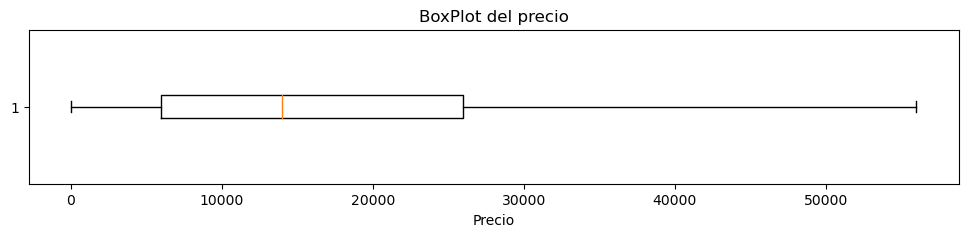

In [329]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['price'], vert=False)
plt.xlabel('Precio')  
plt.title('BoxPlot del precio') 
plt.show()

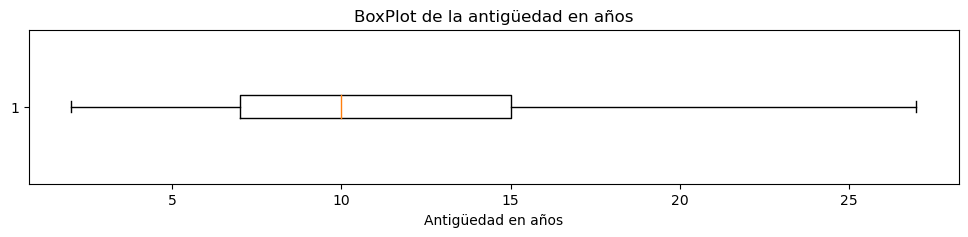

In [330]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['age'], vert=False)
plt.xlabel('Antigüedad en años')  
plt.title('BoxPlot de la antigüedad en años') 
plt.show()

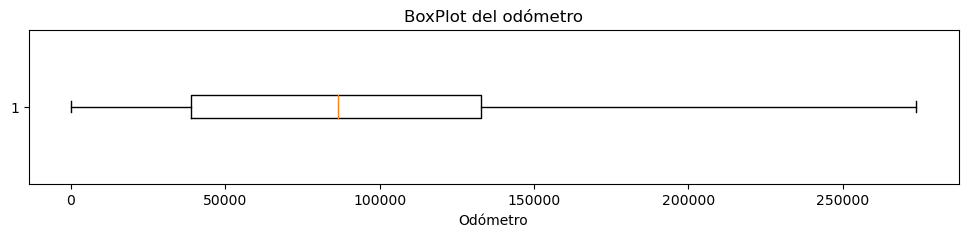

In [331]:
# Creamos el plano para pintar las gráficas, cambiamos el tamaño
plt.figure(figsize=(12, 2))

# Pintamos el boxplot
plt.boxplot(cars_df['odometer'], vert=False)
plt.xlabel('Odómetro')  
plt.title('BoxPlot del odómetro') 
plt.show()

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

Text(0.5, 1.0, 'Histograma del odómetro')

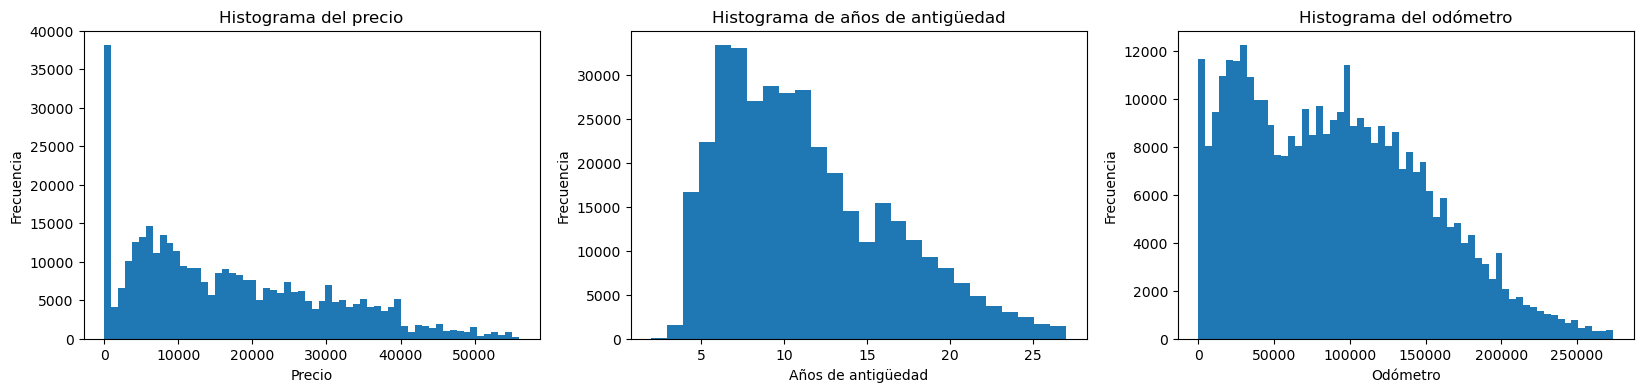

In [332]:
# Creamos el plano para pintar las gráficas
fig, ax = plt.subplots(1, 3, figsize=(20,4))

# Pintamos el histograma de 'price' con sus leyendas:
ax[0].hist(cars_df[['price']], bins=60)
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma del precio')

# Pintamos el histograma de 'age' con sus leyendas:
ax[1].hist(cars_df[['age']], bins=26)
ax[1].set_xlabel('Años de antigüedad')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Histograma de años de antigüedad')

# Pintamos el histograma de 'odometer' con sus leyendas:
ax[2].hist(cars_df[['odometer']], bins=60)
ax[2].set_xlabel('Odómetro')
ax[2].set_ylabel('Frecuencia')
ax[2].set_title('Histograma del odómetro')

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [333]:
# Generamos una función para imprimir histogramas y Q-Q

def explore_data_hist_qq(df, variable):
  
  # Definimos
  plt.figure(figsize=(15,5))

  # Histograma
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f'Histograma de {variable}')

  # Q-Q
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.title(f'Q-Q de {variable}')

  plt.show()

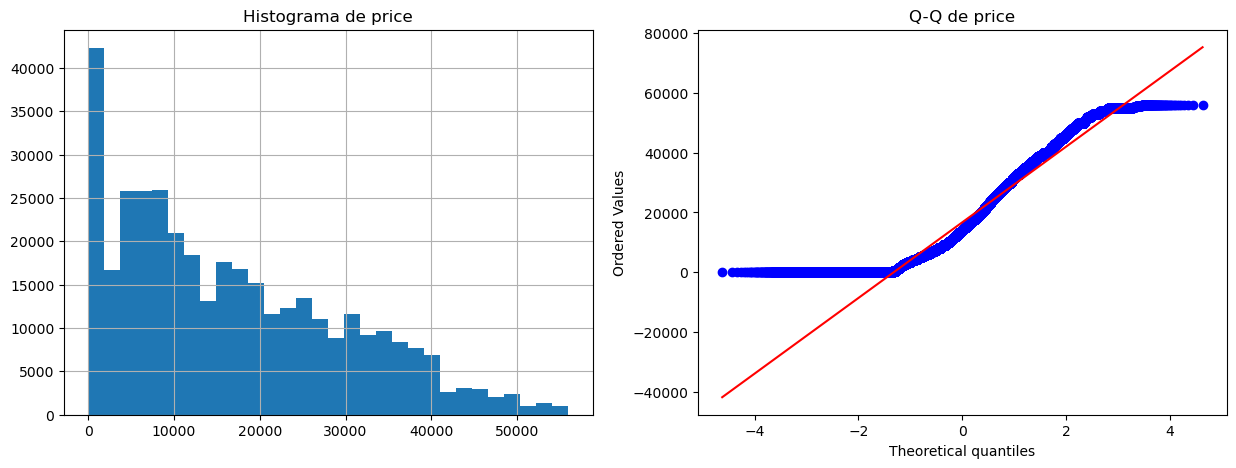

In [334]:
explore_data_hist_qq(cars_df, 'price')

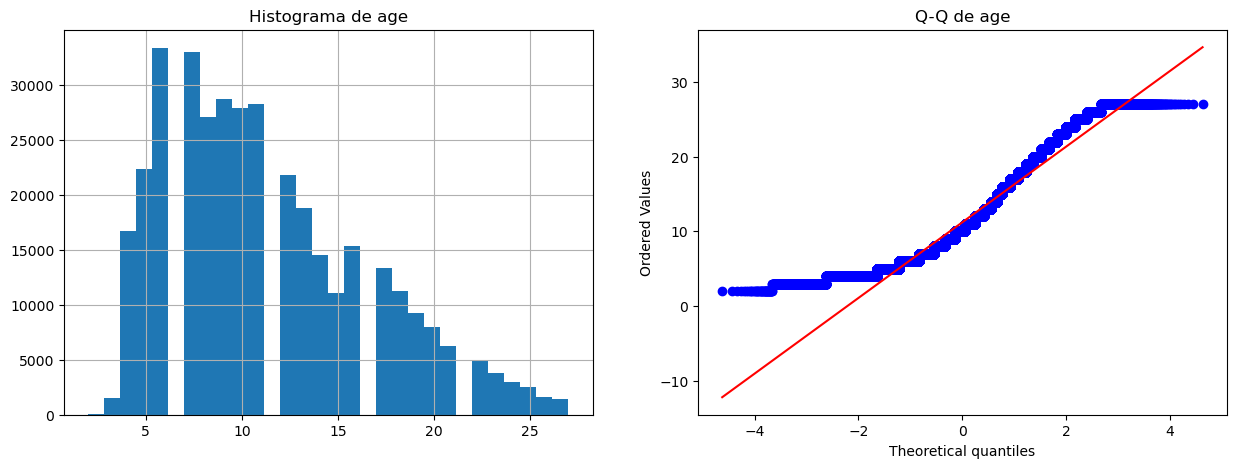

In [335]:
explore_data_hist_qq(cars_df, 'age')

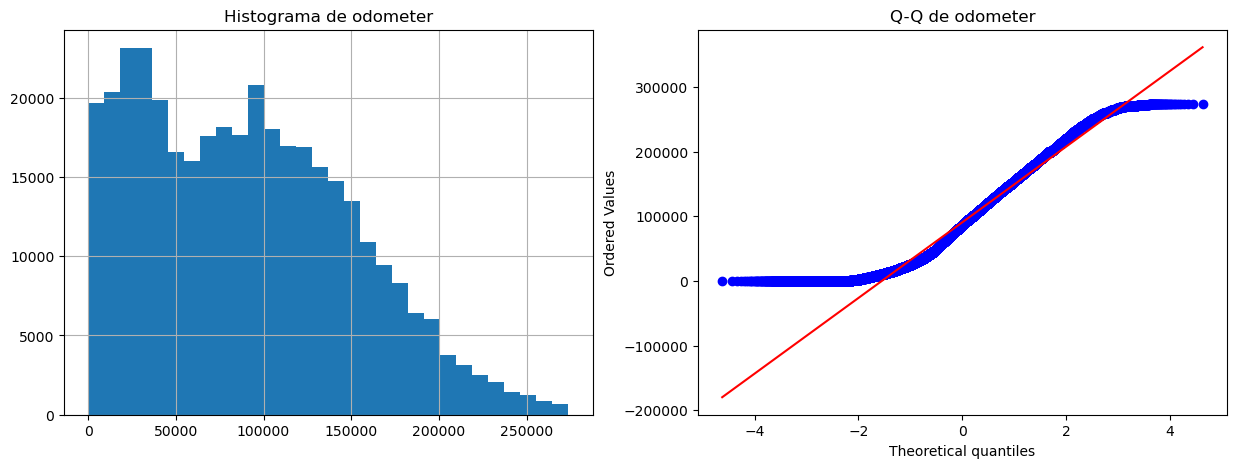

In [336]:
explore_data_hist_qq(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [337]:
transformador = PowerTransformer(method='yeo-johnson')
transformador.fit(cars_df[['age', 'odometer', 'price']])

PowerTransformer()

In [338]:
transf_df = transformador.transform(cars_df[['age', 'odometer', 'price']])

In [339]:
transf_df = pd.DataFrame(transf_df, columns=['age', 'odometer', 'price'])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

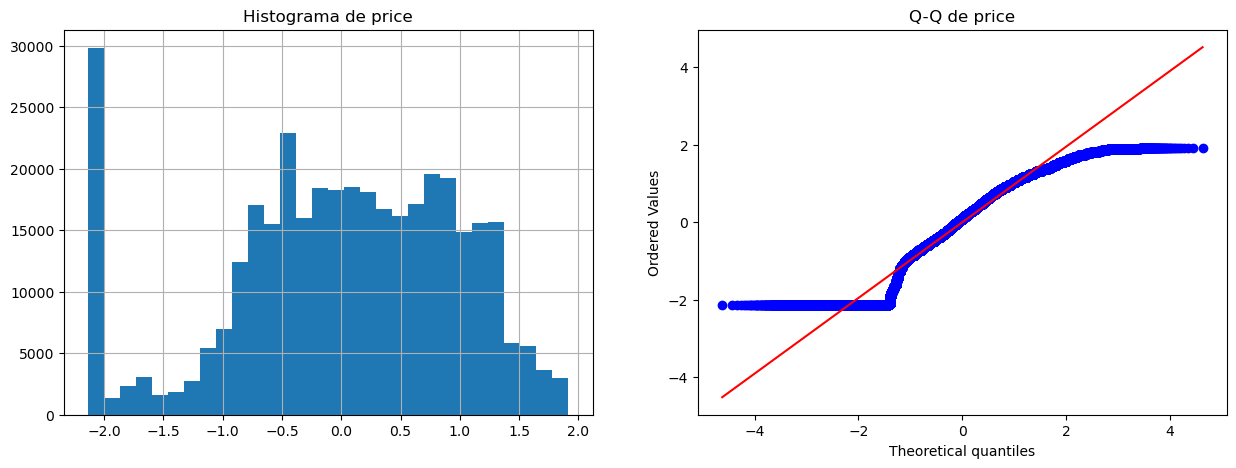

In [340]:
explore_data_hist_qq(transf_df, 'price')

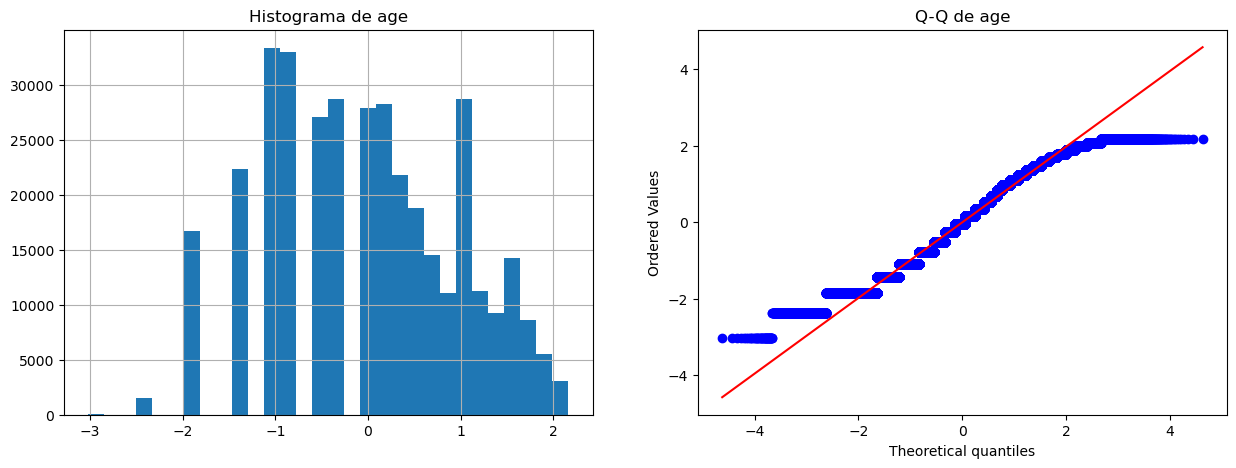

In [341]:
explore_data_hist_qq(transf_df, 'age')

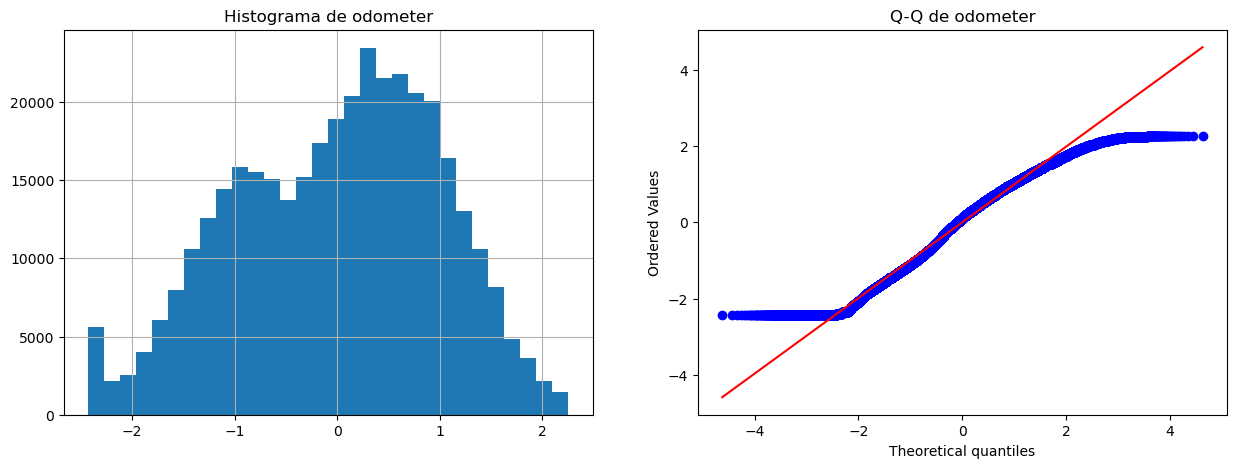

In [342]:
explore_data_hist_qq(transf_df, 'odometer')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [343]:
minmax_scale = preprocessing.MinMaxScaler().fit(transf_df[['age', 'odometer', 'price']])
minmax_df = minmax_scale.transform(transf_df[['age', 'odometer', 'price']])

# Comprobamos los resultados
print('Mínimo después de la escala MinMax:')
print(f'Age: {minmax_df[:,0].min():.2f}')
print(f'Odometer: {minmax_df[:,1].min():.2f}')
print(f'Price: {minmax_df[:,2].min():.2f}')

print('\n')
print('Máximo después de la escala MinMax:')
print(f'Age: {minmax_df[:,0].max():.2f}')
print(f'Odometer: {minmax_df[:,1].max():.2f}')
print(f'Price: {minmax_df[:,2].max():.2f}')

minmax_df = pd.DataFrame(minmax_df, columns=['age', 'odometer', 'price'])

Mínimo después de la escala MinMax:
Age: 0.00
Odometer: 0.00
Price: 0.00


Máximo después de la escala MinMax:
Age: 1.00
Odometer: 1.00
Price: 1.00


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

Text(0.5, 1.0, 'Histograma del odómetro')

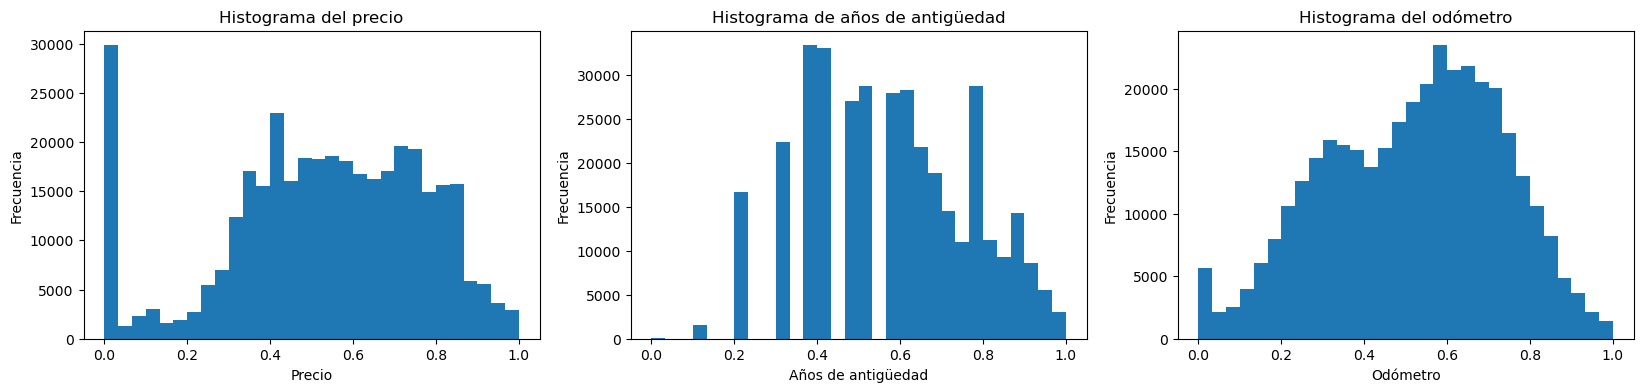

In [344]:
# Creamos el plano para pintar las gráficas
fig, ax = plt.subplots(1, 3, figsize=(20,4))

# Pintamos el histograma de 'price' con sus leyendas:
ax[0].hist(minmax_df[['price']], bins=30)
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma del precio')

# Pintamos el histograma de 'age' con sus leyendas:
ax[1].hist(minmax_df[['age']], bins=30)
ax[1].set_xlabel('Años de antigüedad')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Histograma de años de antigüedad')

# Pintamos el histograma de 'odometer' con sus leyendas:
ax[2].hist(minmax_df[['odometer']], bins=30)
ax[2].set_xlabel('Odómetro')
ax[2].set_ylabel('Frecuencia')
ax[2].set_title('Histograma del odómetro')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [345]:
cars_df.select_dtypes(include=[object]).describe()

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,365579,365579,365579,365579,365579,365579,365579,365579,365579
unique,404,413,40,19055,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3184,2733,61490,7419,311720,353981,290952,154055,41963


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [346]:
highly_cardinal_variables = []
few_cardinal_variables = []

for column in cars_df.columns:
  if(cars_df[column].dtype == 'object'):
    if(cars_df[column].nunique() >= 100):
      highly_cardinal_variables.append(column)
    else:
      few_cardinal_variables.append(column)

print(f'Columnas con alta cardinalidad: {highly_cardinal_variables}')
print(f'Columnas con baja cardinalidad: {few_cardinal_variables}')

Columnas con alta cardinalidad: ['region', 'region_url', 'model']
Columnas con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

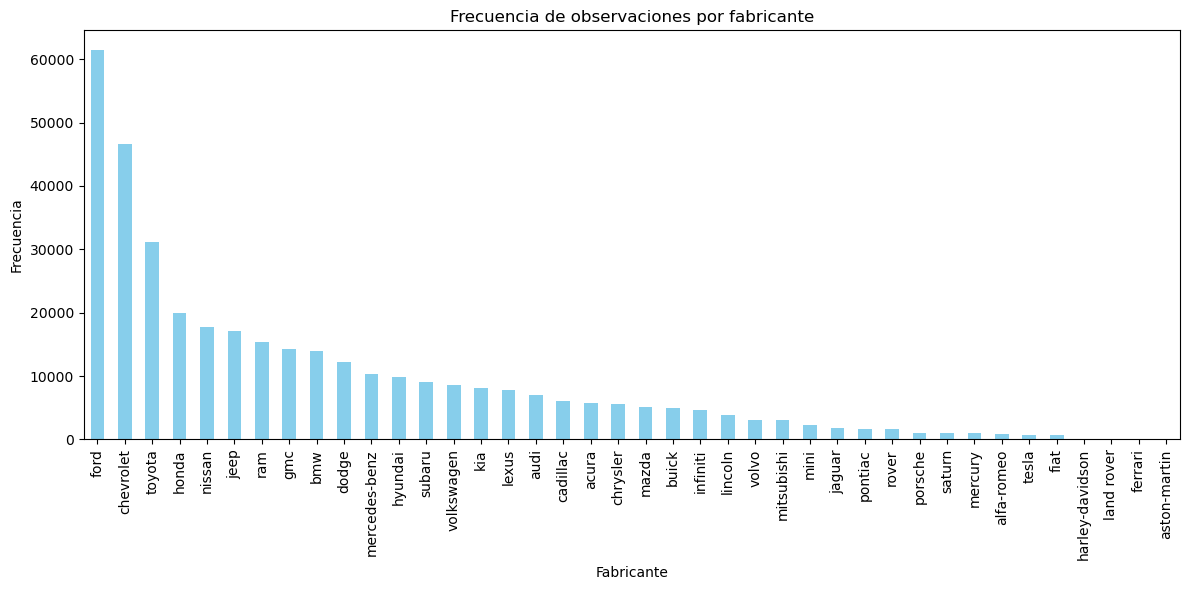

In [347]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['manufacturer'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

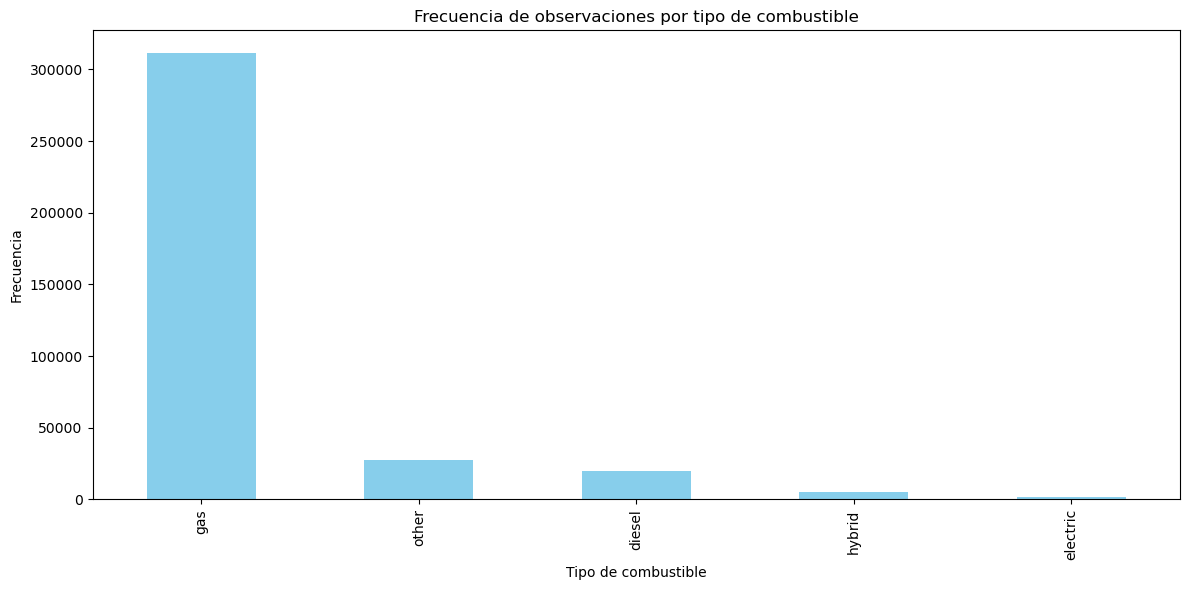

In [348]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['fuel'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

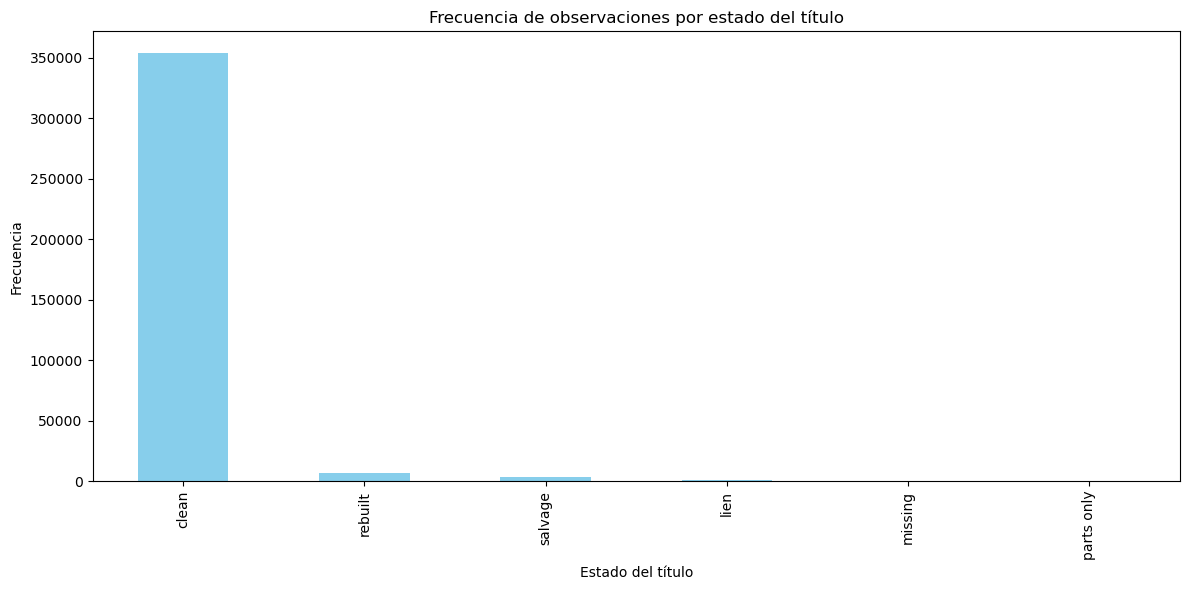

In [349]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['title_status'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por estado del título')
plt.xlabel('Estado del título')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

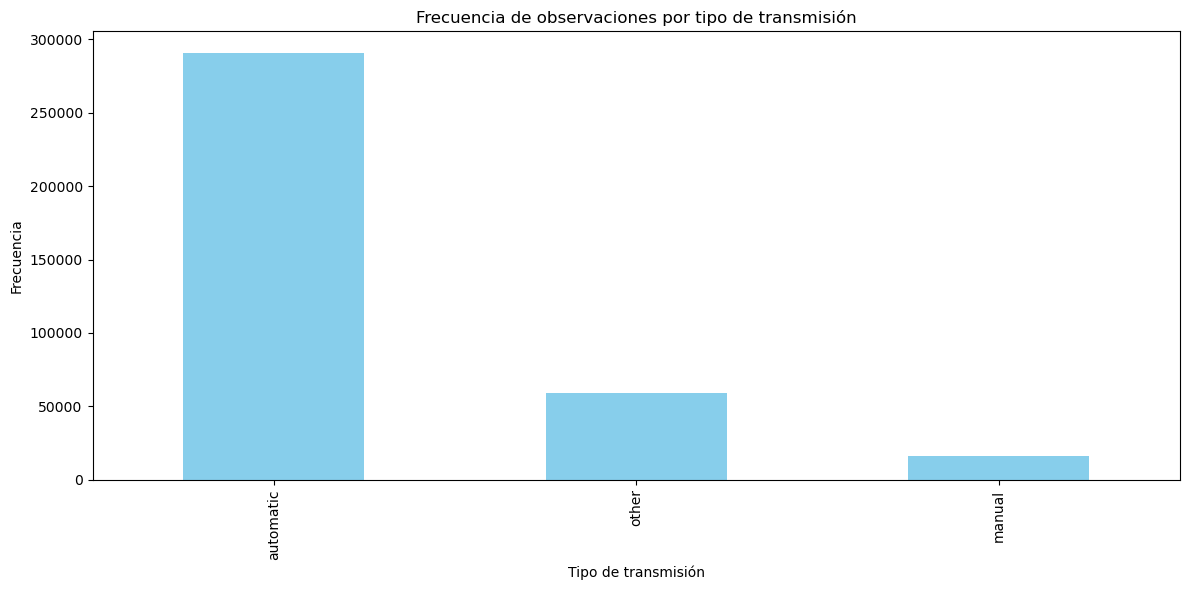

In [350]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['transmission'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por tipo de transmisión')
plt.xlabel('Tipo de transmisión')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

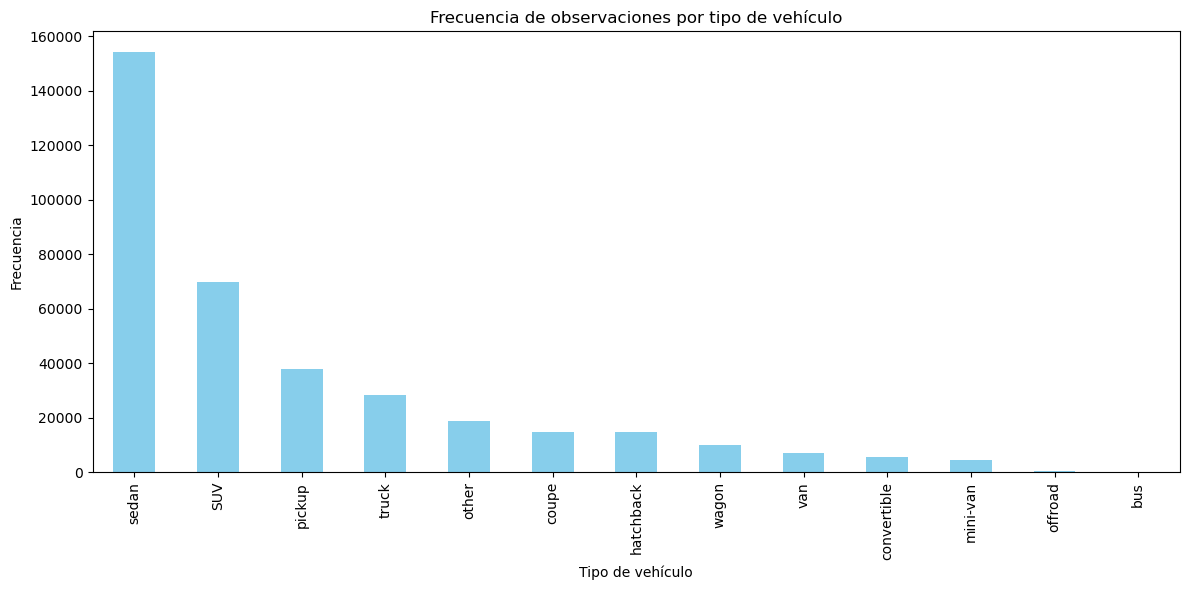

In [351]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['type'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por tipo de vehículo')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

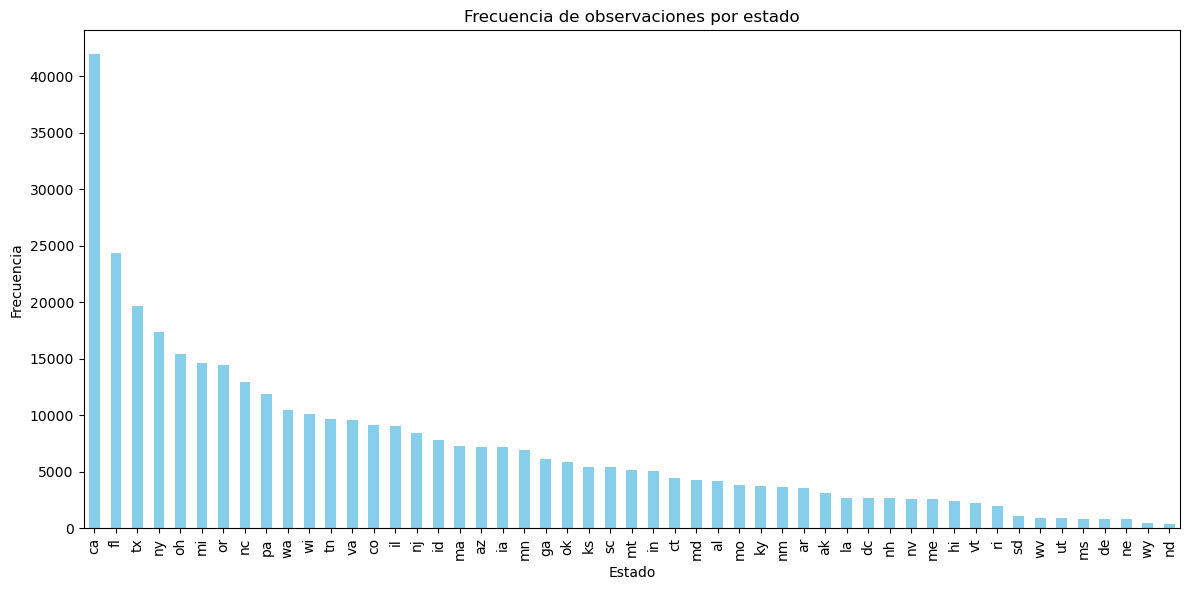

In [352]:
# Contamos la frecuencia de observaciones de la variable categórica
frecuencia_observaciones = cars_df['state'].value_counts()

# Creamos el plano para pintar las gráficas
plt.figure(figsize=(12, 6))

# Pintamos el gráfico de barras
frecuencia_observaciones.plot(kind='bar', color='skyblue')

# Añadimos leyendas
plt.title('Frecuencia de observaciones por estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [353]:
# Definimos un DataFrame vacío llamado 'onehot_df'
onehot_df = pd.DataFrame()

# Con un ciclo for recorremos las columnas definidas en 'few_cardinal_variables'
for column in few_cardinal_variables:

  #Definimos la columna a transformar y con reshape la convertimos en un array de 2 dimensiones
  data = cars_df[column].values.reshape(-1, 1)

  # Definimos el codificador OneHotEncoder y usamos drop='first' para evitar la colinealidad
  encoder = OneHotEncoder(drop='first', sparse_output=False)

  # Transformamos la información
  onehot = encoder.fit_transform(data)

  # Convertimos el resultado en un DataFrame
  onehot = pd.DataFrame(onehot, columns=encoder.get_feature_names_out([column]))

  # Añadimos el resultado al DataFrame 'onehot_df'
  onehot_df = pd.concat([onehot_df, onehot], axis=1)

# Imprimimos la forma final del DataFrame 'onehot_df'
print(f'Forma del DataFrame final: {onehot_df.shape}')

# Imprimimos el encabezado del DataFrame 'onehot_df'
onehot_df.head()

Forma del DataFrame final: (365579, 112)


,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [354]:
# Definimos un DataFrame vacío llamado 'binary_df'
binary_df = pd.DataFrame()

# Con un ciclo for recorremos las columnas definidas en 'highly_cardinal_variables'
for column in highly_cardinal_variables:

  # Definimos el codificador BinaryEncoder
  encoder = BinaryEncoder()

  # Transformamos la información
  binary = encoder.fit_transform(cars_df[column])

  # Añadimos el resultado al DataFrame 'binary_df'
  binary_df = pd.concat([binary_df, binary], axis=1)

# Imprimimos la forma final del DataFrame 'binary_df'
print(f'Forma del DataFrame final: {binary_df.shape}')

# Imprimimos el encabezado del DataFrame 'binary_df'
binary_df.head()

Forma del DataFrame final: (365579, 33)


,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [355]:
# Reestablecemos el índice del DataFrame 'minmax_df'
minmax_df.reset_index(drop=True, inplace=True)

# Reedfinimos el índice del DataFrame 'binary_df'
binary_df.reset_index(drop=True, inplace=True)

# Reedfinimos el índice del DataFrame 'onehot_df'
onehot_df.reset_index(drop=True, inplace=True)

# Concatenamos los DataFrames 'onehot_df', 'binary_df' y 'minmax_df' en un solo DataFrame llamado 'final_df'
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Imprimimos la forma de minmax_df
print(f'Forma del DataFrame minmax_df: {minmax_df.shape}')

# Imprimimos la forma de onehot_df
print(f'Forma del DataFrame onehot_df: {onehot_df.shape}')

# Imprimimos la forma de binary_df
print(f'Forma del DataFrame binary_df: {binary_df.shape}')

# Imprimimos la forma final del DataFrame 'final_df'
print(f'Forma del DataFrame final: {final_df.shape}')

# Imprimimos el encabezado del DataFrame 'final_df'
final_df.head()

Forma del DataFrame minmax_df: (365579, 3)
Forma del DataFrame onehot_df: (365579, 112)
Forma del DataFrame binary_df: (365579, 33)
Forma del DataFrame final: (365579, 148)


,age,odometer,price,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.574513,0.438034,0.802602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.714596,0.488955,0.676330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.223527,0.243039,0.861495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.431871,0.365056,0.775205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.613696,0.667692,0.566557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
